# Exemple: Q learning et DQN

# Reinforcement Learning: DQN FronzenLake

L'environnement FrozenLake consiste en une grille de blocs 4x4, chacun constituant le bloc de départ, le bloc de but, un bloc gelé sécurisé ou un trou dangereux. L'objectif est qu'un agent apprenne à naviguer du début au but sans se déplacer sur un trou. À tout moment, l'agent peut choisir de se déplacer vers le haut, le bas, la gauche ou la droite. Le problème, c’est qu’il ya un vent qui souffle occasionnellement l’agent sur un espace qu’il n’a pas choisi. En tant que tel, une performance parfaite à chaque fois est impossible, mais apprendre à éviter les trous et à atteindre l'objectif est certainement toujours faisable. La récompense à chaque étape est 0, sauf pour entrer dans le but, qui fournit une récompense de 1.

Nous aurons donc besoin d’un algorithme permettant d’apprendre les avantages attendus à long terme. C'est exactement ce que Q-Learning est conçu pour fournir.

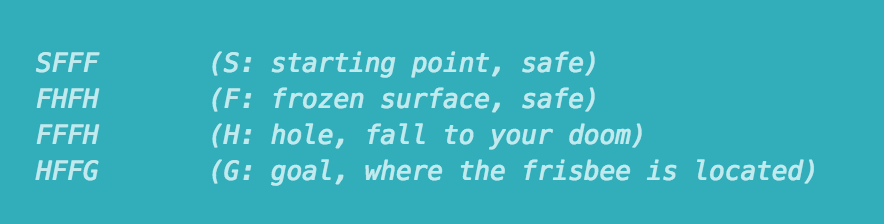

## 1. Q learning 
Dans sa plus simple implémentation, Q-Learning est un tableau de valeurs pour chaque état (ligne) et action (colonne) possible dans l’environnement. Dans chaque cellule du tableau, nous apprenons la valeur de l'efficacité d'une action donnée dans un état donné. Dans le cas de l'environnement FrozenLake, nous avons 16 états possibles (un pour chaque bloc) et 4 actions possibles (les quatre sens du mouvement), ce qui nous donne un tableau 16x4 de valeurs-Q. Nous commençons par initialiser le tableau pour qu'il soit uniforme (tous les zéros), puis à mesure que nous observons les récompenses obtenues pour diverses actions, nous mettons à jour le tableau en conséquence.

Nous apportons des mises à jour à notre tableau Q à l'aide de l'équation de Bellman, qui indique que la récompense à long terme attendue pour une action donnée est égale à la récompense immédiate de l'action actuelle, combinée à la récompense attendue de la meilleure action future prise à l'état suivant. De cette façon, nous réutilisons notre propre tableau Q lorsque nous estimons comment mettre à jour notre tableau pour des actions futures! Sous forme d'équation, la règle ressemble à ceci:

Eq 1. Q(s,a) = r + γ(max(Q(s’,a’))

Cela signifie que la valeur Q pour un ou plusieurs états donnés et que l'action (a) doit représenter la récompense actuelle (r) plus la récompense future maximale actualisée (γ) attendue selon notre propre tableau pour le ou les prochains états. nous nous retrouverions dans. La variable de remise nous permet de décider de l’importance des futures récompenses possibles par rapport à la récompense actuelle. En mettant à jour de cette manière, le tableau commence lentement à obtenir des mesures précises de la récompense future attendue pour une action donnée dans un état donné. Vous trouverez ci-dessous une présentation en Python de l'algorithme Q-Table implémenté dans l'environnement FrozenLake:

In [12]:
!pip install gymnasium
import sys
sys.path.append('c:/users/hossa/.conda/envs/4201/lib/site-packages')
!pip install gymnasium[toy-text]
import gymnasium as gym
import numpy as np

### 1.1 Charger et explorer les fonctions de l'environnement, trouver les différents types de 'render' et listez les au tuteur

In [13]:
env = gym.make('FrozenLake-v1',render_mode='ascii', is_slippery=False)
import tqdm

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/gymnasium/envs/registration.py:734: UserWarning: WARN: The environment is being initialised with render_mode='ascii' that is not in the possible render_modes (['human', 'ansi', 'rgb_array']).
  logger.warn(


In [14]:
# pour afficher l'espace d'états
env.observation_space 

Discrete(16)

In [15]:
# pour afficher l'espace d'actions
env.action_space.n

4

In [16]:
# pour faire un reset()
env.reset()

(0, {'prob': 1})

In [17]:
env.step(1)
env.step(1)
env.step(2)
env.step(2)
env.step(1)
env.step(2)

(15, 1.0, True, False, {'prob': 1.0})

### 1.2 Implémenter l'algorithme d'apprentissage Q-Table

In [18]:
#Initialiser la table avec des zéros
Q = np.zeros([env.observation_space.n,env.action_space.n])
# ces deux parametres sont le learning rate et la aging function , changez ces valeurs plus tard
lr = .8
y = .95
num_episodes = 500
#créer deux listes  avec la récompense totale et les étapes par épisode
#jList = []
rList = []
for i in tqdm.tqdm(range(num_episodes)):
    #faire un reset de l' environment 
    s = env.reset()
    s = s[0]
    rAll = 0
    d = False
    j = 0
    # l'algo Q-learning ci dessous
    while j < 99:
        j+=1
        # on choisit l'action soit de la table soit greedy , c'est a dire aléatoire
        # si on utilise la table , on doit prendre l'action qui rend le maximum de reward
        a = np.argmax(Q[s,:] + np.random.randn(1,env.action_space.n)*(1./(i+1)))
        # on a choisit l'action, on l'effectue....
        s1,r,d,_,_ = env.step(a)
        #on met à jour la table avec ce résultat , tout est dans la ligne qui suit.....
        Q[s,a] = Q[s,a] + lr*(r + y*np.max(Q[s1,:]) - Q[s,a])
        rAll += r
        s = s1
        if d == True:
            break
    #jList.append(j)
    rList.append(rAll)

100%|██████████| 500/500 [00:00<00:00, 13174.47it/s]


In [19]:
print ("Score en fonction des épisodes: " +  str(sum(rList)/num_episodes))

Score en fonction des épisodes: 0.856


In [20]:
print(Q)

[[0.         0.         0.77378094 0.        ]
 [0.         0.         0.81450625 0.        ]
 [0.         0.857375   0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.9025     0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.95       0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         1.         0.        ]
 [0.         0.         0.         0.        ]]


### 1.3 L'algorithme Qlearning avec le réseau de neurones , on parle de DQN. Mais on se contente d'un réseau de neurones trivial 

Maintenant, vous pensez peut-être que les tables sont excellentes, mais elles ne sont pas vraiment à l’échelle, n'est-ce pas? Bien qu'il soit facile d'avoir une table 16x4 pour un monde en grille simple, le nombre d'états possibles dans un jeu moderne ou dans un environnement réel est presque infiniment plus grand. Pour les problèmes les plus intéressants, les tables ne fonctionnent tout simplement pas. Nous avons plutôt besoin d’un moyen de prendre une description de notre état et de produire des valeurs Q pour des actions sans tableau: c’est là que les réseaux de neurones entrent en jeu. En jouant le rôle d’approximateur de fonctions, nous pouvons prendre autant d’états possibles qui peuvent être: représenté sous forme de vecteur et apprendre à les mapper à des valeurs Q.

Dans le cas de l'exemple FrozenLake, nous utiliserons un réseau à une couche qui prend l'état codé dans un vecteur à une chaleur (1x16) et produit un vecteur de 4 valeurs Q, une pour chaque action. Un réseau aussi simple agit en quelque sorte comme une table glorifiée, les poids du réseau servant d'anciennes cellules. La principale différence est que nous pouvons facilement étendre le réseau Tensorflow avec des couches supplémentaires, des fonctions d'activation et différents types d'entrées, alors que tout cela est impossible avec une table normale. La méthode de mise à jour est également un peu différente. Au lieu de mettre directement à jour notre table, avec un réseau, nous utiliserons la rétropropagation et une fonction de perte. Notre fonction de perte sera la perte de la somme des carrés, où la différence entre les valeurs Q prévues actuelles et la valeur «cible» est calculée et les gradients passés à travers le réseau. Dans ce cas, notre cible Q pour l'action choisie est l'équivalent de la valeur Q calculée dans l'équation 1 ci-dessus.

Eq2. Loss = ∑(Q-target - Q)²


Vous trouverez ci-dessous la procédure pas à pas de Tensorflow pour la mise en œuvre de notre simple réseau Q:

In [21]:
import gym
import numpy as np
import random
#import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
env = gym.make('FrozenLake-v1')

### 1.4 Mettre en place le réseau lui-même

In [23]:
tf.reset_default_graph()

In [24]:
#These lines establish the feed-forward part of the network used to choose actions
inputs1 = tf.placeholder(shape=[1,16],dtype=tf.float32)

# hidden1 = tf.placeholder(shape=[16,16],dtype=tf.float32)

# hidden2 = tf.placeholder(shape=[16,16],dtype=tf.float32)

# hidden3 = tf.placeholder(shape=[16,16],dtype=tf.float32)

W = tf.Variable(tf.random_uniform([16,4],0,0.01))

# q1=
# q2
# q3=
Qout = tf.matmul(inputs1,W)
predict = tf.argmax(Qout,1)

#Ci-dessous, nous calculons la back propagation en prenant la somme des carrés de la différence entre les valeurs Q cible et de prédiction.
nextQ = tf.placeholder(shape=[1,4],dtype=tf.float32)
loss = tf.reduce_sum(tf.square(nextQ - Qout))
### pour une fois, on prend autre chose que adam..... mais il faudra tester adam a la fin et comparer
trainer = tf.train.GradientDescentOptimizer(learning_rate=0.003)
updateModel = trainer.minimize(loss)

### 1.5 Apprentissage

In [26]:
init = tf.initialize_all_variables()

# Réglage des paramètres
y = .99
e = 0.1
num_episodes = 30000
#create lists to contain total rewards and steps per 

with tf.Session() as sess:
    sess.run(init)
    #for i in range(num_episodes):
    for i in tqdm.tqdm(range(num_episodes)):
        #Reset environment and get first new observation
        s = env.reset()
        s=s[0]
        rAll = 0
        d = False
        j = 0
        #The Q-Network
        while j < 99:
            j+=1
            #Choose an action by greedily (with e chance of random action) from the Q-network
            a,allQ = sess.run([predict,Qout],feed_dict={inputs1:np.identity(16)[s:s+1]})
            a=a[0]
            if np.random.rand(1) < e:
                a = env.action_space.sample()
            #Get new state and reward from environment
            s1,r,d,_,_ = env.step(a)
 
            #Obtain the Q' values by feeding the new state through our network
            Q1 = sess.run(Qout,feed_dict={inputs1:np.identity(16)[s1:s1+1]})
            #Obtain maxQ' and set our target value for chosen action.
            maxQ1 = np.max(Q1)
            targetQ = allQ
            targetQ[0,a] = r + y*maxQ1
            #Train our network using target and predicted Q values
            _,W1 = sess.run([updateModel,W],feed_dict={inputs1:np.identity(16)[s:s+1],nextQ:targetQ})
            rAll += r
            s = s1
            if d == True:
                #Reduce chance of random action as we train the model.
                 
                #e = e/((i/50) + 10)
                break
        jList.append(j)
        rList.append(rAll)
print ("Percent of successful episodes: " + str(sum(rList)/num_episodes *100) + "%")

100%|██████████| 30000/30000 [01:41<00:00, 295.52it/s]

Percent of succesful episodes: 13.886666666666667%


### 1.6 Quelques statistiques sur les performances du réseau

Nous pouvons voir que les êtres du réseau atteignent constamment le but autour de la marque des 750 épisodes.

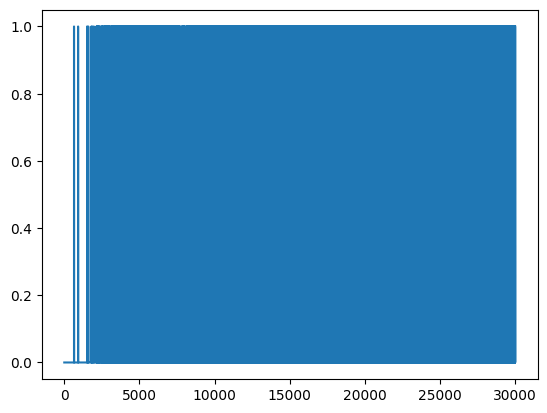

In [27]:
plt.plot(rList)


Il commence également à progresser dans l'environnement plus longtemps que le hasard autour de 750.

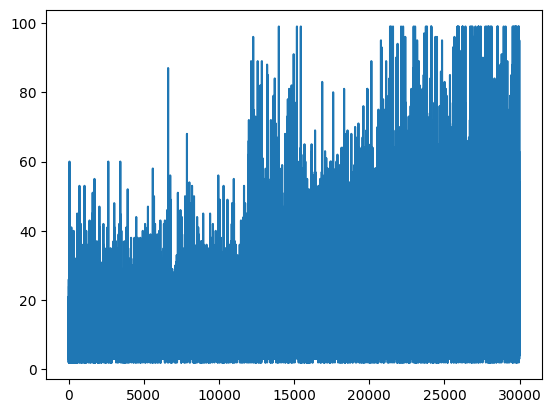

In [28]:
plt.plot(jList)


Alors que le réseau apprend à résoudre le problème FrozenLake, il s'avère qu’il ne le fait pas aussi efficacement que Q-Table. Bien que les réseaux de neurones permettent une plus grande flexibilité, ils le font au détriment de la stabilité de Q-Learning. Il existe plusieurs extensions possibles de notre réseau Q-Network simple, qui permettent de meilleures performances et un apprentissage plus robuste. Deux astuces en particulier sont appelées Experience Replay et Freezing Target Networks. Ces améliorations et autres ajustements ont été la clé pour faire en sorte qu'Atari joue Deep Q-Networks, et nous explorerons ces ajouts dans le futur.